In [1]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\julia_rxokckg\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\julia_rxokckg\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\julia_rxokckg\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\julia_rxokckg\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[n

True

In [2]:
# Wczytaj dokument
with open('article.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [19]:
# Tokenizacja
tokens = word_tokenize(text)
print("Liczba tokenów:", len(tokens))

# Usuń stop-words używając standardowej listy dla słów angielskich
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
print("Liczba słów po usunięciu stop-words:", len(tokens_no_stopwords))

# Ręczne przeglądnięcie pozostałych słów
custom_stopwords = ['said', 'also', 'could', 'however', 'la', 'le', 'much']
stop_words.update(custom_stopwords)
tokens_custom_filtered = [word for word in tokens_no_stopwords if word.lower() not in stop_words]
print("Liczba słów po dodaniu własnych stop-words:", len(tokens_custom_filtered))

# Lematyzacja - WordNetLemmatizer z NLTK - usuwanie odmian słów
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens_custom_filtered]
print("Liczba słów po lematyzacji:", len(lemmatized_tokens))

Liczba tokenów: 3054
Liczba słów po usunięciu stop-words: 1393
Liczba słów po dodaniu własnych stop-words: 1358
Liczba słów po lematyzacji: 1358


In [20]:
from collections import Counter

bow_vector = Counter(lemmatized_tokens)

# Wyświetlenie np. 10 najczęstszych słów
print("Najczęstsze słowa:", bow_vector.most_common(10))

with open('bow_vector.txt', 'w', encoding='utf-8') as f:
    for word, count in bow_vector.most_common():
        f.write(f"{word}: {count}\n")

Najczęstsze słowa: [('belmondo', 41), ('film', 32), ('stunt', 26), ('french', 16), ('action', 14), ('verneuil', 12), ('letellier', 10), ('one', 9), ('cinema', 9), ('time', 9)]


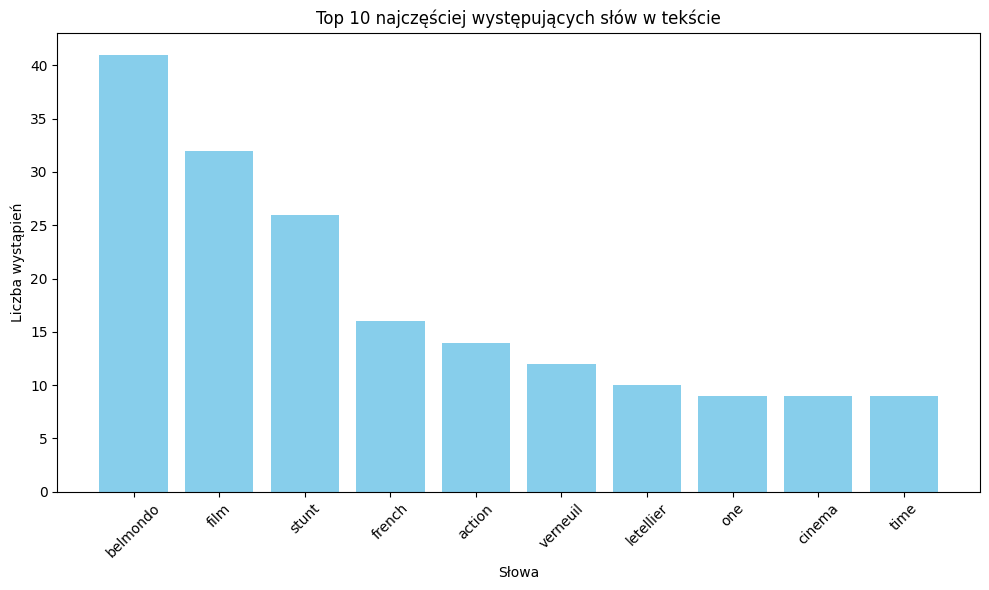

In [21]:
import matplotlib.pyplot as plt

# Pobranie 10 najczęściej występujących słów
most_common_words = bow_vector.most_common(10)
words, counts = zip(*most_common_words)

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 najczęściej występujących słów w tekście')
plt.xlabel('Słowa')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

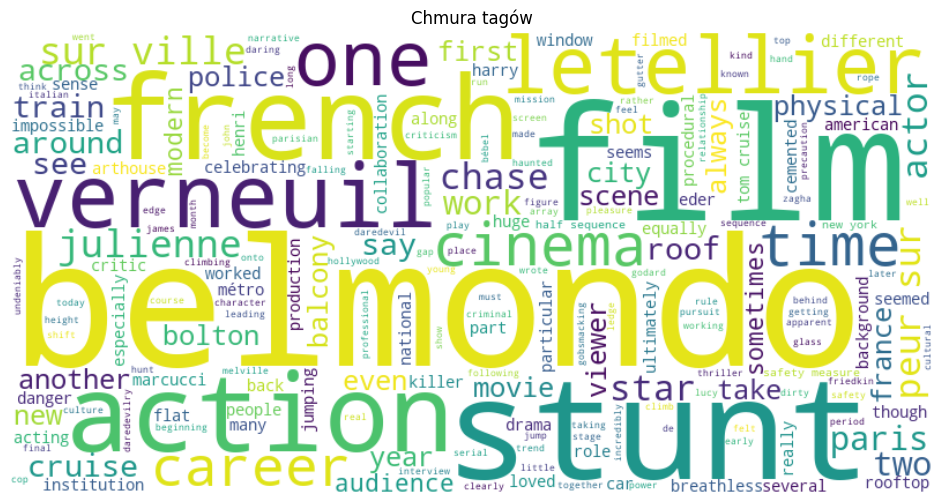

In [22]:
from wordcloud import WordCloud

# Utworzenie tekstu ze zlematyzowanych tokenów
text_for_wordcloud = ' '.join(lemmatized_tokens)

# Generowanie chmury tagów
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Wyświetlenie chmury tagów
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura tagów')
plt.show()